# Project 2- Ames Housing Data

## Table of Contents

- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Sources](#Sources)
- [Imports and Functions](#Imports-and-Functions)
- [Data Cleaning](#Data-Cleaning)

- [Imputation](#Imputation)
- [One-Hot Encoding](#One-Hot-Encoding)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

- [SLR Regression](#SLR-Regression-Model)
- [Lasso Regression](#Lasso-Regression-Using-Log)
- [Ridge Regression](#Ridge-Regression-Using-Log)


- [Data Visualizations](#Data-Visualizations-for-Presentation)

- [Conclusions and Recommendations](#Conclusions-and-Recommendations)



## Problem Statement

Two business partners who are expanding into real estate are looking to develop a long-term partnership with your analytics consulting firm, and you are tasked to develop a prediction model that will highlight the need for deeper analytics as they develop their strategy and enter the market. We hope to draw them into greater partnership with the firm.

The model will ideally predict and immediately provide the price of a house at sale. For the purposes of developing the model, a standard pricing dataset will be given. the model should be able to account for a variety of factors. 

## Background

In the U.S. housing market, predictive modeling is typically uses as a means to provide realtors an up-to-date comparison and price point for a home they are targeting in a buying/selling opportunity.

Historically, pricing and rent values of homes have primarily been based on total surface area and features, while location also plays a significant role on market values. Official home appraisals are done within the home on these values, as well as some prospects in the local market. 

For realtors and licensed professionals, a more complex form of analysis is used. Comparative Market Analysis ist often used as a means to evaluate a great deal of features. These are more complex forms of pricing evaluation, as it takes the broader market into consideration, and uses a defined set of metrics within the real-estate industry to evaluate housing markets. Namely:

* **"Rule of Three"**- Housing data that is current (within 6 months, ideally 3) is appropriate for analysis, while anything outside of that is excluded. Pending housing opportunities that have not yet closed may be used as well.
* **Market environment and location**
* **Surface area and lot size**
* **Overall condition and misc. features** - Any and all features are potential indicators of a house's value, and feature importance may shift due to culture or geography.
* **Financing terms**

These metrics encompass most of the pricing variables that matter within traditional modeling, and will be what we look to factor in within our modeling.

## Sources
##### [Back to Table of Contents](#Table-of-Contents)

### Publications
Comparative market analysis: A guide. Rocket Mortgage. (n.d.). https://www.rocketmortgage.com/learn/comparative-market-analysis. 

Daniel Barr, C. F. A. (2018, June 28). Real estate valuation using regression analysis – a tutorial. Toptal Finance Blog. https://www.toptal.com/finance/real-estate/real-estate-valuation. 

### Data Background

The Data set contains information from the Ames Assessor's office on individual residential properities sold in Ames, IA from 2006 to 2010.

### Datasets


* [`train.csv`](./datasets/test.csv): Ames Housing Data, training set we will use as a predictor;([source](https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data))

* [`test.csv`](./datasets/test.csv): testing data we will make our prediction on;([source](https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data))




<H3><center>Data Dictionary</center></H3>

<H5><center>Dataset has been condensed to show most utilized features within the model, Full data dictionary is sourced below:</center></H5>

Original Source Data - ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Id**|*integer*|`train.csv`, `test.csv`|ID| 
|**lot_area**|*integer*|`train.csv`, `test.csv`|Lot size in square feet| 
|**overall_qual**|*integer*|`train.csv`, `test.csv`|Rates the overall material and finish of the house| 
|**1st_flr_sf**|*integer*|`train.csv`, `test.csv`|First Floor square feet|
|**2nd_flr_sf**|*integer*|`train.csv`, `test.csv`|Second floor square feet| 
|**gr_liv_area**|*integer*|`train.csv`, `test.csv`|Above grade (ground) living area square feet|
|**year_built**|*integer*|`train.csv`, `test.csv`|Original construction date| 
|**year_remod/add**|*integer*|`train.csv`, `test.csv`|Remodel date (same as construction date if no remodeling or additions)|
|**full_bath**|*integer*|`train.csv`, `test.csv`|Basement full bathrooms|
|**fireplaces**|*integer*|`train.csv`, `test.csv`|Number of fireplaces|
|**total_bsmt_sf**|*Float*|`train.csv`, `test.csv`|Total basement surface area|


<H3><center>Engineered Features</center></H3>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**bedroom_abvgr**|*integer*|`train.csv`, `test.csv`|Bedrooms above ground| 
|**heating_qc_Ex**|*integer*|`train.csv`, `test.csv`|If heating quality is excellent| 
|**external_qual_Ex**|*integer*|`train.csv`, `test.csv`|If exterior quality is excellent| 
|**kitchen_qual_Ex**|*integer*|`train.csv`, `test.csv`|If kitchen quality is excellent|
|**garage_area_and_cars**|*integer*|`train.csv`, `test.csv`|Size of garage in square feet * Size of garage in car capacity| 
|**foundation_PConc**|*integer*|`train.csv`, `test.csv`|Foundation of poured concrete|
|**mas_vnr_type_None**|*integer*|`train.csv`, `test.csv`|Houses without masonry| 



## Imports and Functions

In [4]:
#Import Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso, RidgeCV
import statsmodels.api as sm

%matplotlib inline

In [5]:
def null_check(df):
    '''This function runs preliminary analysis 
    on the features and missing values of the dataset'''
    print(df.isnull().sum())
    print(df.dtypes)
    return df.describe()

In [6]:
def drop(df, c_name):
    '''This function drops a specific column from the dataset'''
    df.drop(columns = c_name, inplace=True)
    return df

In [7]:
def title_fix(df):
    '''This function lowers case on headings and replaces 
    whitespace with _ so that running commands is more manageable'''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", '_')
    return 'complete'
    

In [8]:
def fill_na(df):
    '''This function fill's nan variables given a dataframe, 
    but is specifically for operations on columns'''
    mean = df.mean()
    df = df.fillna(mean)
    return 'complete'

In [9]:
def fill_na_cat(df, string):
    '''This function fill's nan variables given a dataframe, 
    and is specifically for operations on categorical values'''
    df = df.fillna(string)
    return 'complete'

In [10]:
def imputation(column):
    '''This function takes a numerical column and fills na values in that column with the 
    mean of the column and returns a null count before and after to show the change'''
    print(f'initial missing: {column.isnull().sum()}')
    a = column.mean()
    result = column.fillna(a)
    return result

## Data Cleaning

In [11]:
#Read in csv data, SalePrice is target Y
ames_train = pd.read_csv('datasets/train.csv')
ames_test = pd.read_csv('datasets/test.csv')

ames_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [12]:
#See dtype and null count of columns
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The above info function shows that we have several columns that are < 100 null rows (garage_area, etc.), as well as several that are more than 70% null (fence, alley). We are going to impute the mean for the former, and check the kaggle external data dictionary to determine whether columns can be salvaged. (https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data)

Below is an indicator of this:

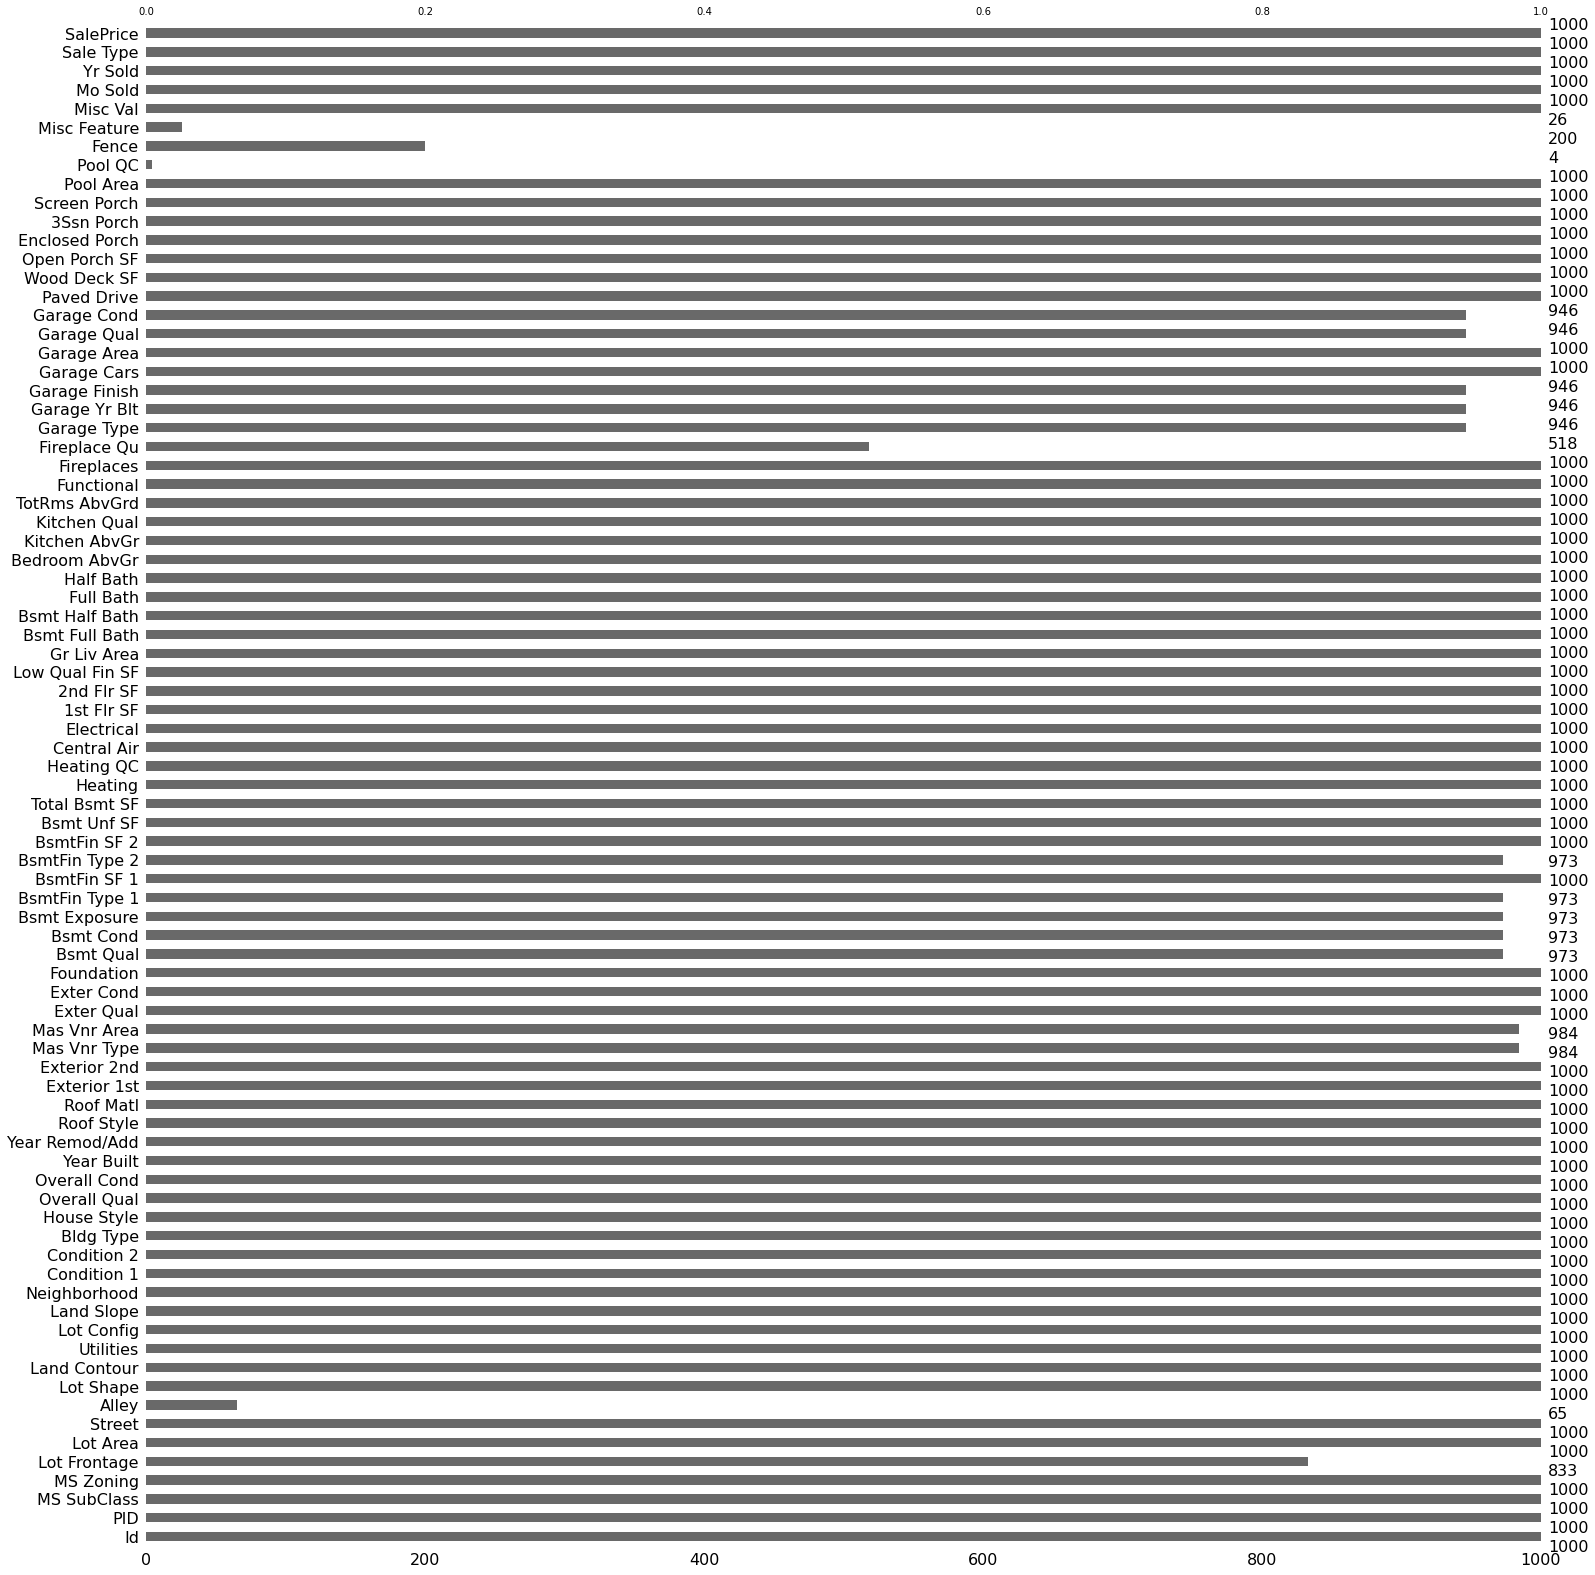

In [13]:
#Check for nulls
msno.bar(ames_train.sample(1000));

In [14]:
#Make heading titles lower_case, remove white space
title_fix(ames_train)
title_fix(ames_test)

'complete'

### Imputation
##### [Back to Table of Contents](#Table-of-Contents)

It looks like the columns with significant missing data can be interpreted, as they are categorical in nature and the nan values are actually categorical indicators that the house does not have that particular feature. 

In [15]:
#Imput values onto null values
ames_train.loc[ames_train['total_bsmt_sf'].isnull(),'total_bsmt_sf'] = ames_train['1st_flr_sf']
ames_test.loc[ames_test['total_bsmt_sf'].isnull(),'total_bsmt_sf'] = ames_test['1st_flr_sf']
ames_train['garage_area']= imputation(ames_train['garage_area'])
ames_test['garage_area'] = imputation(ames_test['garage_area'])
ames_train['garage_cars'] = imputation(ames_train['garage_cars'])
ames_test['garage_cars'] = imputation(ames_test['garage_cars'])

initial missing: 1
initial missing: 0
initial missing: 1
initial missing: 0


Above, we imputed values to replace NAN values. Alongside our use of the mean of the data, we utilized an approach to give total basement surface area a similar area to the 1st floor. This won't affect the model in any great way as there were <10 rows affected by the imputation

As few columns are categorical, we will change them to binary to give us a better dimension with which we can test. We will do one-hot encoding after to do the same across a larger subset of features

In [16]:
#Binarize Values

binarize = {'Ex': 1, 'Gd': 1, 'TA':1, 'Fa': 1, 'No_basement': 0 }
binarize2 = {'Ex': 1, 'Gd': 1, 'TA':1, 'Fa': 1, 'No_basement': 0 }

ames_train['bsmt_qual'] = ames_train['bsmt_qual'].map(binarize)
ames_test['bsmt_qual'] = ames_train['bsmt_qual'].map(binarize)

In [17]:
#Change to categorical binary variable (no, yes, to 0,1)
ames_test['central_air']= pd.Series(np.searchsorted(['No', 'Yes'], ames_test.central_air.values), ames_test.index)
ames_train['central_air']= pd.Series(np.searchsorted(['No', 'Yes'], ames_train.central_air.values), ames_train.index)

ames_train['central_air'].value_counts()

1    1910
0     141
Name: central_air, dtype: int64

### One Hot Encoding
##### [Back to Table of Contents](#Table-of-Contents)

Below we push categorical values into a binary format using one-hot-encoding, before pushing it back into our master model. What we are primarily interested in is the quality values for different features. (kitchen_qual, fireplace_qual, etc.)

In [18]:
#Pd get dummies to one-hot encode
hot_encode_train = pd.get_dummies(ames_train)
hot_encode_train['saleprice'] = ames_train['saleprice']
hot_encode_test = pd.get_dummies(ames_test)

#csv to data folder so when can check to see what we want to add
hot_encode_test.to_csv('datasets/Encode.csv')

This heatmap shows the immediate correlation of our new df with newly encoded variables. 

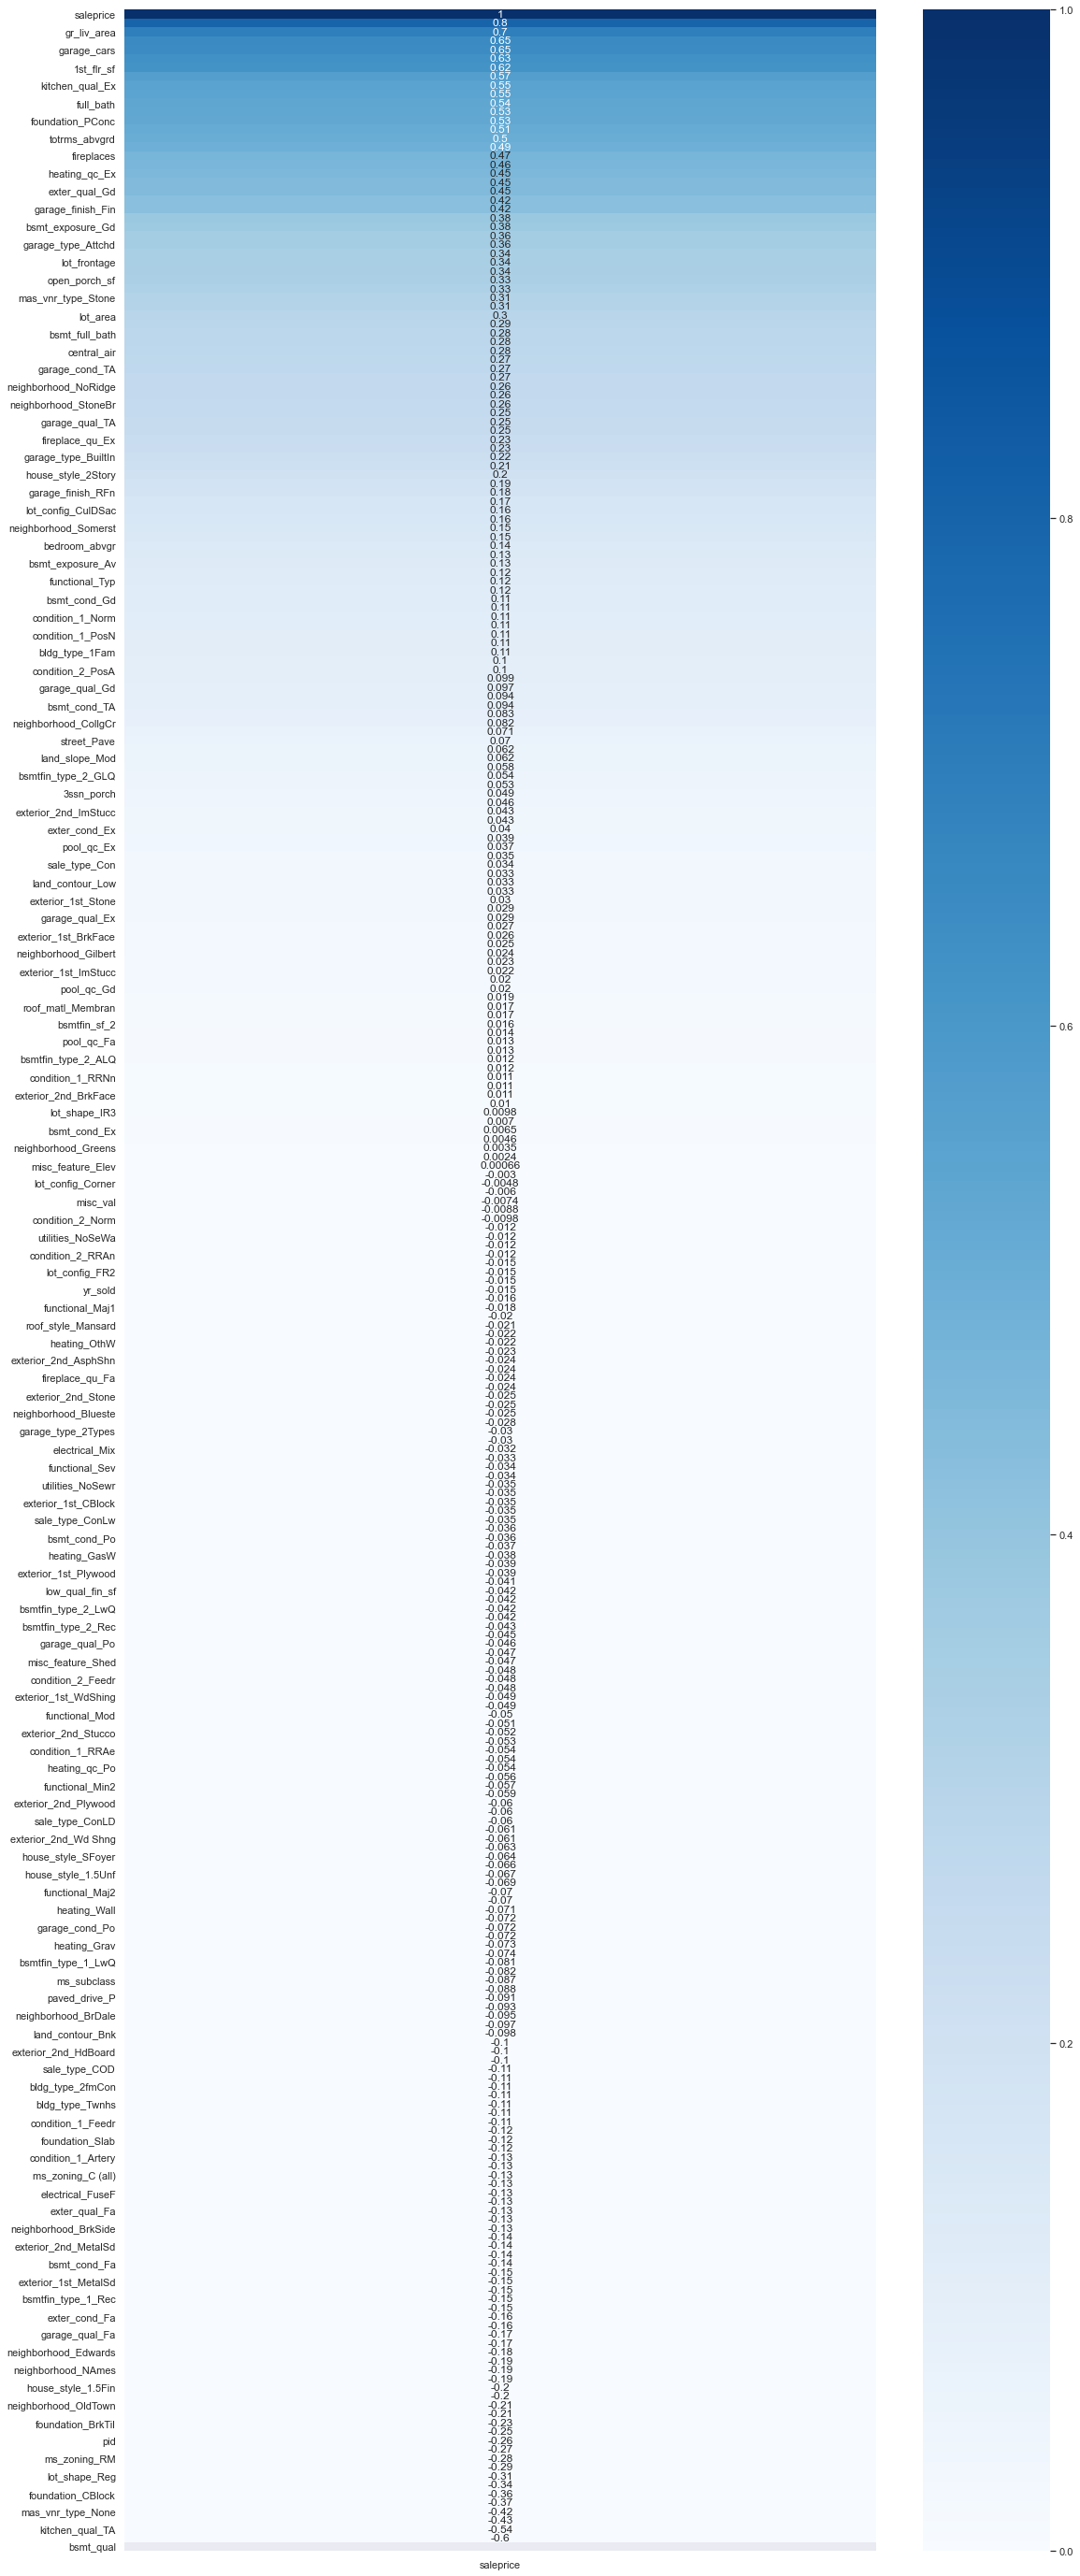

In [19]:
#Run filtered heatmap to show correlation
heatmap = hot_encode_train.corr()

sns.set(rc={'figure.figsize':(18,50)})

sns.heatmap(heatmap[['saleprice']].sort_values(by = 'saleprice',ascending = False),
            annot = True,
            vmin = 0,
            vmax = 1,
            cmap = 'Blues');

We see quality variables score relatively high on correlation, and will pull those as well as several other highly correlated variables out.

In [20]:
#Dataframe of selected categories
hot_encode_df = hot_encode_train[['exter_qual_Ex', 'exter_cond_Ex', 
                                  'heating_qc_Ex', 'kitchen_qual_Ex', 
                                  'fireplace_qu_Ex', 
                                  'garage_cond_Ex', 'foundation_PConc', 
                                  'mas_vnr_type_None']]

hot_encode_df_test = hot_encode_test[['exter_qual_Ex', 'exter_cond_Ex', 
                                  'heating_qc_Ex', 'kitchen_qual_Ex', 
                                  'fireplace_qu_Ex', 
                                  'garage_cond_Ex', 'foundation_PConc', 
                                      'mas_vnr_type_None']]

In [21]:
#Concat hot encoded variables onto original Dataframe
ames_train = pd.concat([ames_train, hot_encode_df], axis=1)
ames_test = pd.concat([ames_test, hot_encode_df_test], axis=1)

In [22]:
ames_test.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,yr_sold,sale_type,exter_qual_Ex,exter_cond_Ex,heating_qc_Ex,kitchen_qual_Ex,fireplace_qu_Ex,garage_cond_Ex,foundation_PConc,mas_vnr_type_None
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,2006,WD,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,2006,WD,0,0,0,0,0,0,0,1


In [23]:
#Change titles for columns to match Kaggle competition requirements
ames_train = ames_train.rename(columns={'saleprice': 'SalePrice', 'id': 'Id'})
ames_test = ames_test.rename(columns={'id': 'Id'})


## Exploratory Data Analysis
##### [Back to Table of Contents](#Table-of-Contents)

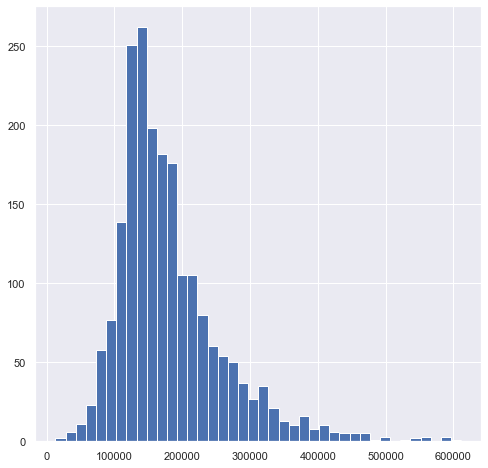

In [24]:
#Show distribution of variable we want to predict
plt.figure(figsize=(8,8))
plt.hist(ames_train['SalePrice'], bins = 40);

results_path = 'images/skew.png'

#print(results_path)
plt.savefig(results_path)

The skew of the distribution may present a challenge in actually evaluating 'SalePrice'. We take the log to see if the model skew can be reduced.

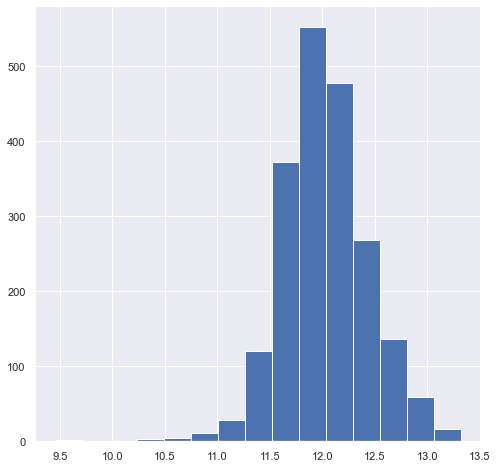

In [25]:
#transform to log
plt.figure(figsize=(8,8))
np.log(ames_train['SalePrice']).hist(bins =15);

results_path = 'images/log_transform.png'

#print(results_path)
plt.savefig(results_path)

This shows a more normal distribution, and will be the distribution we use for our second/third models to determine the scale of improvement on the first.

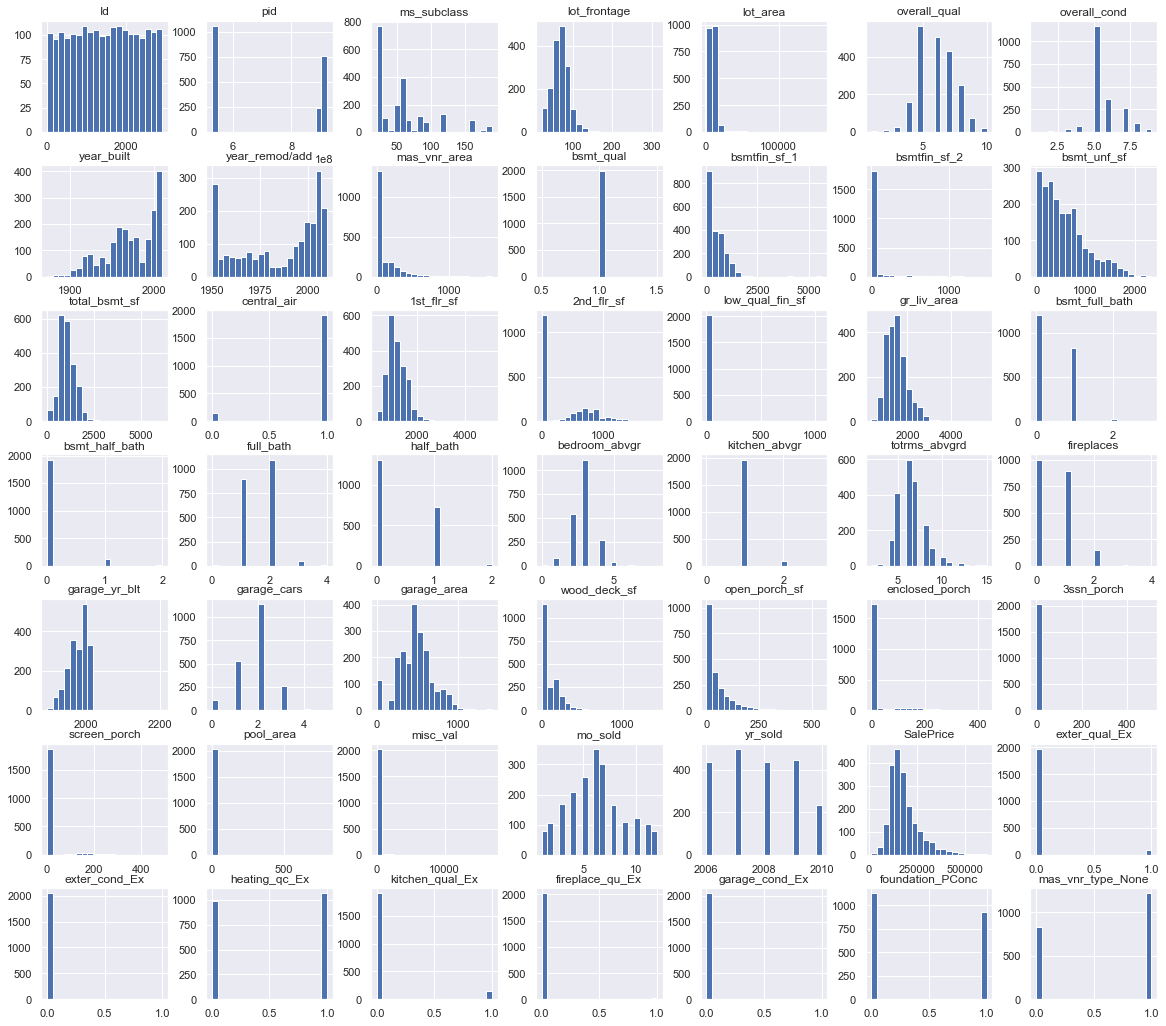

In [26]:
ames_train.hist(bins=20, figsize=(20, 18));

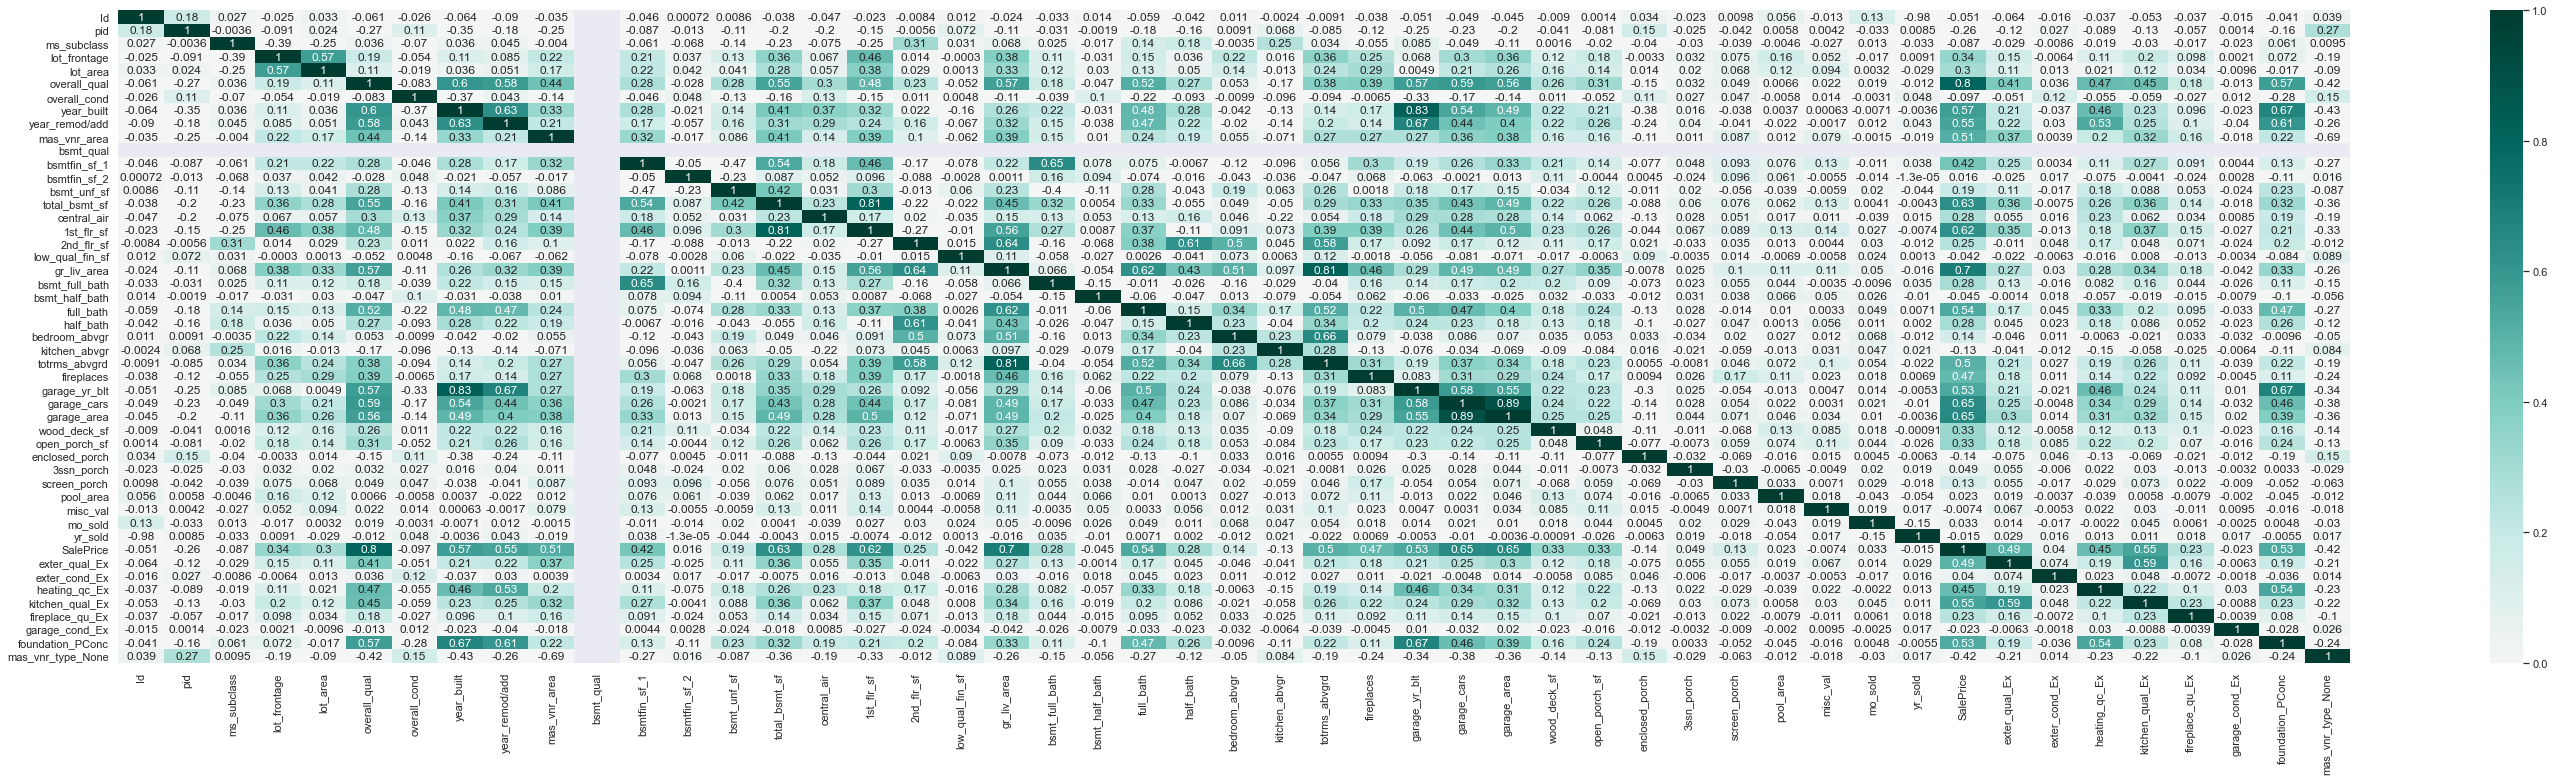

In [27]:

#Run filtered heatmap to show correlation
#Check for Multicollinearity

heatmap = ames_train.corr()

sns.set(rc={'figure.figsize':(50,12)})

sns.heatmap(heatmap,
            center=0,
            annot = True,
            vmin = 0,
            vmax = 1,
            cmap='BrBG');

results_path = 'images/heatmap.png'

#print(results_path)
plt.savefig(results_path)

Out of our dataset, There appear to be a few instances of high correlation between variables. This was found late in the analysis process. One instance between garage cars and garage area is accounted for below in a engineered variable that is intended to help reduce multicollinearity.

In [28]:
#Combine variable to reduce multi-collinearity
ames_train['garage_area_and_cars'] = ames_train['garage_cars'] * ames_train['garage_area']
ames_test['garage_area_and_cars'] = ames_test['garage_cars'] * ames_test['garage_area']

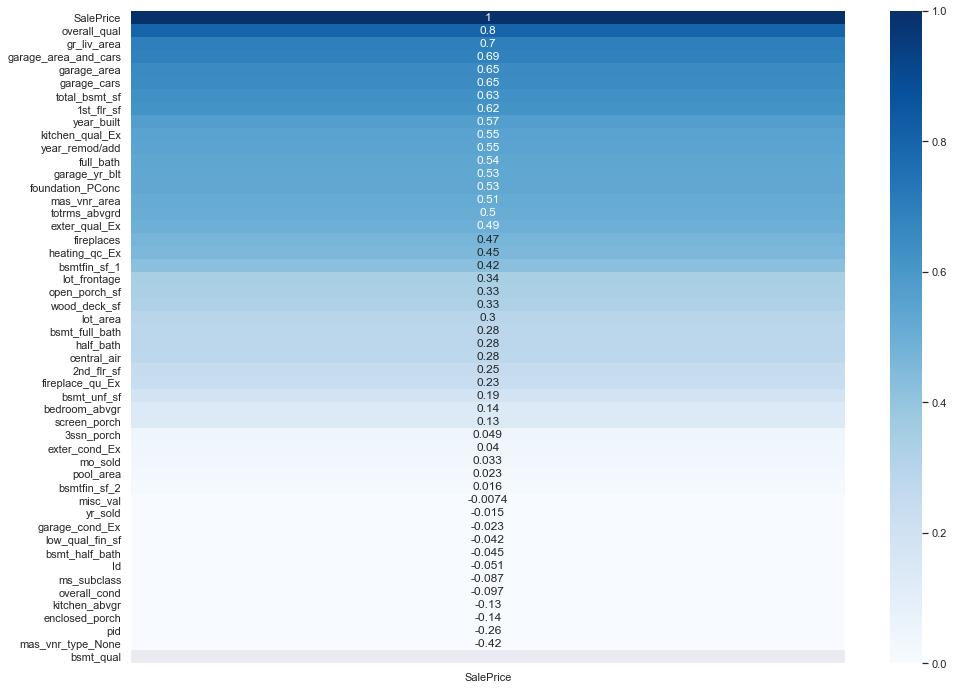

In [29]:
#Run filtered heatmap to show correlation
heatmap = ames_train.corr()

sns.set(rc={'figure.figsize':(16,12)})

sns.heatmap(heatmap[['SalePrice']].sort_values(by = 'SalePrice',ascending = False),
            annot = True,
            vmin = 0,
            vmax = 1,
            cmap = 'Blues');

results_path = 'images/correlation.png'

#print(results_path)
plt.savefig(results_path)

The heatmap shows high correlations for overall quality, living area, garage_area,surface area, and the year it was built (among others), so we will further evaluate these items. Later, we will model in any features with a correlation above +- .4 .

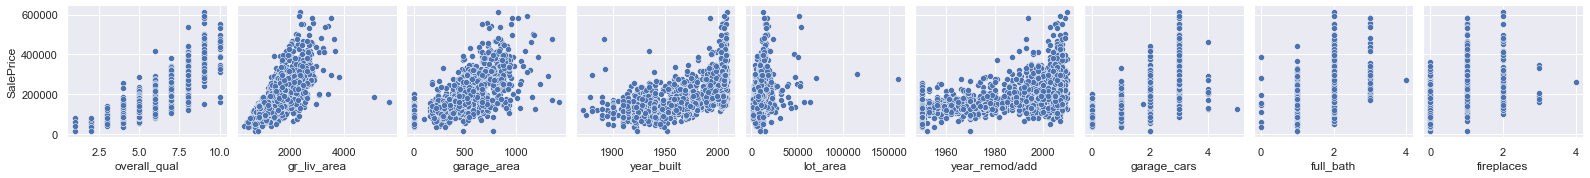

In [30]:
sns.pairplot(data = ames_train,
            y_vars = ['SalePrice'],
            x_vars = ['overall_qual', 'gr_liv_area', 'garage_area', 
                      'year_built', 'lot_area', 'year_remod/add','garage_cars', 'full_bath', 'fireplaces'],
            diag_kind = None);

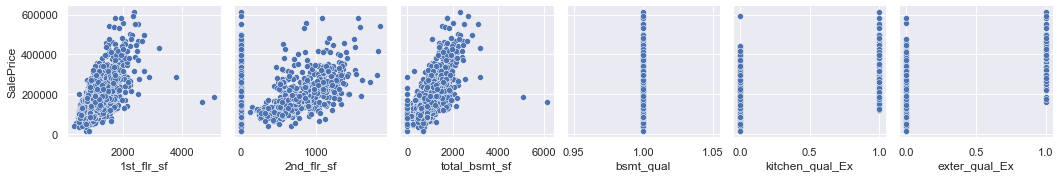

In [31]:
sns.pairplot(data = ames_train,
            y_vars = ['SalePrice'],
            x_vars = ['1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 
                      'bsmt_qual','kitchen_qual_Ex', 'exter_qual_Ex'],
            diag_kind = None);

Within our data, overall_qual is the best linear metric, while 1st_flr_sf, gr_liv_area, total_bsmt_sf, and 2nd_flr_sf seem to be the good options, although a few outliers in the data (specifically 2nd_flr_sf) may present issues in the model generalizing data. We will remove several of these outliers below, as that will draw greater fit to the model without compromising the data.



In [32]:
#Remove Outliers
ames_train = ames_train.loc[ames_train['1st_flr_sf'] < 3800]
ames_train = ames_train.loc[ames_train['gr_liv_area'] < 4200]
ames_train = ames_train.loc[ames_train['total_bsmt_sf'] < 4200]
ames_train = ames_train.loc[ames_train['lot_area'] < 100000]
ames_train = ames_train.loc[ames_train['full_bath'] < 4]
ames_train = ames_train.loc[ames_train['fireplaces'] < 4]

### Creating Null Prediction

The below data will be our null prediction. This is a baseline prediction that centers on the mean of the 'SalePrice' series.

In [33]:
#Base 182,000
pred_array=np.full_like(ames_train['Id'], ames_train['SalePrice'].mean(), dtype=float)
y_train = ames_train['SalePrice']

pred_array

array([181198.14390602, 181198.14390602, 181198.14390602, ...,
       181198.14390602, 181198.14390602, 181198.14390602])

In [34]:
#test MSE
print("MSE is ")
print(mean_squared_error(y_train, pred_array))
print("RMSE is ")
print(mean_squared_error(y_train, pred_array, squared = False))

MSE is 
6275758143.342972
RMSE is 
79219.68280258999


#### **Finding #1 : The null model RMSE begins at around 79,000.  We will use this metric as the baseline with which we will evaluate the other models**

## Alternative Baseline Null Model (based on 3 features)
##### [Back to Table of Contents](#Table-of-Contents)

This model was incorporated initally as a stand-in before we chose the null model using the mean as the sales price.

In [35]:
features = pd.DataFrame(ames_train, columns= ['overall_qual', '1st_flr_sf', 'lot_area'
                                              ])

In [36]:
X = features
y = ames_train['SalePrice']

In [37]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=32)

In [38]:
linreg = LinearRegression()

In [39]:
lr_scores = cross_val_score(linreg, X_train, y_train, cv = 5)

lr_scores.mean()

0.7704980260103135

In [40]:
# Fit the model on training data
linreg.fit(X_train, y_train)

LinearRegression()

In [41]:
# Training score
print(linreg.score(X_train, y_train))

# Testing score
print(linreg.score(X_test, y_test))

0.7726596251394944
0.7260889947651716


In [42]:
#test MSE

y_pred = linreg.predict(X_train)

print("MSE is ")
print(mean_squared_error(y_train, y_pred))
print("RMSE is ")
print(mean_squared_error(y_train, y_pred, squared = False))

MSE is 
1473972177.139788
RMSE is 
38392.345293558035


In [43]:

y_pred = linreg.predict(X_test)
print("MSE is ")
print(mean_squared_error(y_test, y_pred))
print("RMSE is ")
print(mean_squared_error(y_test, y_pred, squared = False))

MSE is 
1585956751.0901086
RMSE is 
39824.07250759406


In [44]:
#Find and plot residuals
residuals0 = y_test-y_pred

In [45]:
residuals0 = y_test - y_pred 

viz0 = y_pred
res0 = residuals0

## SLR Regression Model
##### [Back to Table of Contents](#Table-of-Contents)

Our first model is targeting the SalePrice as is, meaning we aren't running the log transformation on the data quite yet, which means the distribution will still be slightly skewed.

Below are the features we want to predict on. We selected similar test data features to remain consistent. Primarily, all features below were selected as they had a .4 correlation with the y variable.

In [46]:
#Create Features

features = pd.DataFrame(ames_train, columns= ['Id','overall_qual', '1st_flr_sf',
                                              '2nd_flr_sf','total_bsmt_sf', 
                                              'gr_liv_area', 'garage_area_and_cars', 
                                              'year_built', 'year_remod/add', 
                                              'full_bath', 'lot_area', 'kitchen_qual_Ex', 
                                              'exter_qual_Ex', 'heating_qc_Ex', 'fireplaces', 'bedroom_abvgr', 'foundation_PConc', 
                                      'mas_vnr_type_None'])

ames_test = pd.DataFrame(ames_test, columns= ['Id', 'overall_qual', '1st_flr_sf',
                                              '2nd_flr_sf','total_bsmt_sf', 
                                              'gr_liv_area', 'garage_area_and_cars', 
                                              'year_built', 'year_remod/add', 'full_bath', 
                                              'lot_area', 'kitchen_qual_Ex', 'exter_qual_Ex','heating_qc_Ex', 'fireplaces',
                                               'bedroom_abvgr', 'foundation_PConc', 
                                      'mas_vnr_type_None'])


In [47]:
#Check to make sure there are no null values
features.isnull().sum()

Id                      0
overall_qual            0
1st_flr_sf              0
2nd_flr_sf              0
total_bsmt_sf           0
gr_liv_area             0
garage_area_and_cars    0
year_built              0
year_remod/add          0
full_bath               0
lot_area                0
kitchen_qual_Ex         0
exter_qual_Ex           0
heating_qc_Ex           0
fireplaces              0
bedroom_abvgr           0
foundation_PConc        0
mas_vnr_type_None       0
dtype: int64

In [48]:
#Identify our prediction and features
X = features
y = ames_train['SalePrice']

SalePrice will be our prediction variable, and now we will begin our validation by dividing our data into training and test sets. Our test size will be .30, as going higher may introduce lower variance and push the model into an underfit situation.

In [49]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=32)


In [50]:
#check after creating the split to make sure our shape matches; it does
assert (X_train.shape[0] == y_train.shape[0])
assert (X_test.shape[0] == y_test.shape[0])
assert (X_train.shape[0] + X_test.shape[0]) == (y_train.shape[0] + y_test.shape[0])

Here we add in our Scaler to ensure that any significant variance in scale between features (surface area being in hundreds vs. year_built being 50, etc.) is nullified and does not affect the model or the eventual test data we predict on.

In [51]:
#Import a scaler on the training data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
ames_test1 = ss.transform(ames_test)

In [52]:
#Instantiate Linear Regression
linreg = LinearRegression()

### Cross Validation
##### [Back to Table of Contents](#Table-of-Contents)

We run a cross validation on the regression to get our r-squared, which is the amount of variation that is explained by our inputs (features).

In [53]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg, X_train_sc, y_train, cv = 5)

lr_scores.mean()

0.8869059410760661

#### **Finding #1 : Our R-squared, while not excellent, shows that we have a good degree of variance that is explained by our model's current mix of features.**

### Fit Model

In [54]:
# Fit the model on training data
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [55]:
# Training score
print(linreg.score(X_train_sc, y_train))

# Testing score
print(linreg.score(X_test_sc, y_test))

0.8918685439090617
0.8662454826532757


The r-squared scores indicate our model is performing fairly close with the training set in terms of fit, indicating that it does relatively well on unseen data. There is room for improvement on the score of the model to better predict sale prices of home given features, as well as develop a closer fit. At present the model is slightly overfit, as the training score is marginally higher than the testing score.

In [56]:
#test MSE

y_pred = linreg.predict(X_train_sc)

print("MSE is ")
print(mean_squared_error(y_train, y_pred))
print("RMSE is ")
print(mean_squared_error(y_train, y_pred, squared = False))

MSE is 
701075459.4270896
RMSE is 
26477.829583013212


In [57]:
# test MSE

y_pred = linreg.predict(X_test_sc)
print("MSE is ")
print(mean_squared_error(y_test, y_pred))
print("RMSE is ")
print(mean_squared_error(y_test, y_pred, squared = False))

MSE is 
774444530.2333682
RMSE is 
27828.84349435614


In [58]:
#Find and plot residuals
residuals = y_test-y_pred

In [59]:
viz1 = y_pred
res1 = residuals


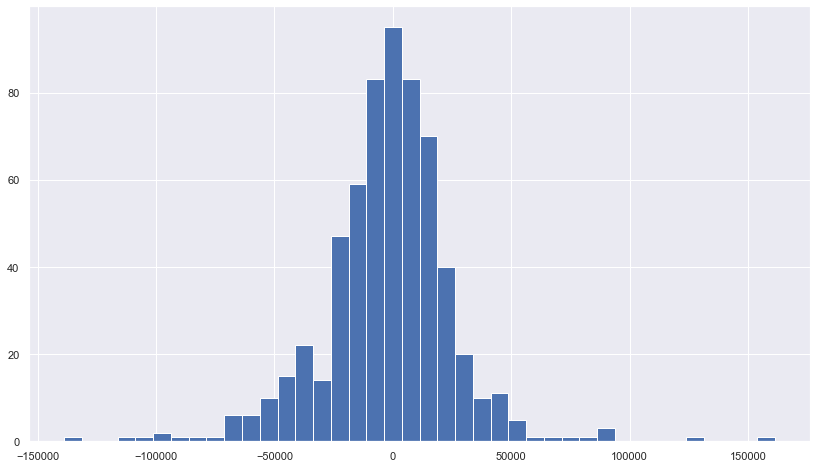

In [60]:
#Check for Normality 
plt.figure(figsize= (14,8))
plt.hist(res1, bins = 40);

In [61]:
x = list(zip(X, linreg.coef_))

df = pd.DataFrame(x, columns = ['feature', 'coef'])



In [62]:
df['coef']= df['coef'].abs()

df['coef'] = df['coef'].round()


df.sort_values('coef', axis = 0, ascending = False)


,feature,coef
3,2nd_flr_sf,20390.0
2,1st_flr_sf,18846.0
1,overall_qual,16383.0
4,total_bsmt_sf,12065.0
11,kitchen_qual_Ex,9670.0
12,exter_qual_Ex,8992.0
10,lot_area,8112.0
7,year_built,8085.0
15,bedroom_abvgr,7191.0
6,garage_area_and_cars,6970.0


In [63]:
print(linreg.intercept_)

180842.24335664333


#### **Finding #2 : Our RMSE shows that for any prediction, we are at most 27,300 away from the true prediction.**

#### **Finding #3 : Our intercept shows that the baseline house, all else being 0, would price at $180,000**

#### **Finding #4 : Our coefficients shows that for the baseline house, all else being constant, surface area is a significant determinant of price, as expected, while quality ratings were significant indicators of price within this dataset. In terms of quality, the Kitchen and Exterior (siding, roofing, etc.) quality were the highest indicators of price.**

### K-Folds Cross Validation

In [64]:
# Instantiate model
linreg= LinearRegression()

Perform cross_val_score function with 5 folds

In [65]:
#Use the model for a cross_val_score
cross_val_score(estimator=linreg, X=X, y=y)

array([0.87052575, 0.8985385 , 0.89159454, 0.8776864 , 0.87487787])

In [66]:
#Find R^2
cross_val_score(estimator=linreg, X=X, y=y).mean()

0.882644611932341

In [67]:
cross_val_score(estimator=linreg, X=X, y=y).std()

0.01062534211378812

In [68]:
#Run the cross validation on our training subset

In [69]:
linreg = LinearRegression()
cross_val_score(estimator=linreg, X=X_train, y=y_train, cv=5)

array([0.87912427, 0.8786037 , 0.89230758, 0.90496851, 0.87952564])

In [70]:
#Make predictions
y_pred[0:5]

array([127477.33864861, 203478.74478784, 160722.28503332, 209940.49543151,
       140171.41691137])

In [71]:
linreg = LinearRegression()
cross_val_predict(estimator=linreg, X=X, y=y)[0:5]


array([170528.95601366, 232038.53293233, 120295.0523655 , 145448.4475602 ,
       138707.57787758])

## Lasso Regression Using Log
##### [Back to Table of Contents](#Table-of-Contents)

We will be adding another regression, the Lasso regression below, which runs an algorithm that will normalize data by penalizing high coefficients, hopefully reducing the amount of overfit in our previous linear model. Additionaly, we will incorporate the log transformation that allows for our predictive variable (SalePrice) to be evaluated as a normally distributed variable, as opposed to a skewed distribution which will throw our prediction off.

In [72]:
#Choose features and prediction variable
X2 = features
y2 = ames_train['SalePrice']

#Train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    y2, 
                                                    test_size=0.30, 
                                                    random_state=32)

In [73]:
ss = StandardScaler()
ss.fit(X_train2)

X_train_sc2 = ss.transform(X_train2)
X_test_sc2 = ss.transform(X_test2)

**Transformed Target Regressor**- We used this function to transform the y predictor into a log, before instantiating a regression. The inverse function reverses the log transformation we did without reverting our new results, allowing us to get a normalized MSE we can interpret. We set the alpha to .1, which tightens up our coefficients from the previous model without severely reducing the amount of coefficients (if our alpha was higher, like .5) the model is using.



In [74]:
#Instantiate model
TTR = TransformedTargetRegressor(regressor=Lasso(alpha=0.01),func=np.log,inverse_func=np.exp)

In [75]:
# Fit the model on training data
linreg2 = TTR.fit(X_train_sc2, y_train2)

In [76]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg2, X_train_sc2, y_train2, cv = 5)

lr_scores.mean()

0.9043351115642311

In [77]:
# Training score
print(linreg2.score(X_train_sc2, y_train2))

# Testing score
print(linreg2.score(X_test_sc2, y_test2))

0.9076964665694944
0.897468238774463


In [79]:
#Unable to see coefficient due to that feature not being present in transformed target regressor.

#### **Finding #1 : The Lasso linear regression we ran increased our score and r-squared values by 2 points, as 90% of the variables are able to be explained by the variance. The fit of the model is also improved as a result of the log transformation.**

In [80]:
#train MSE

y_pred2 = linreg2.predict(X_train_sc2)
print("MSE: ")
print(mean_squared_error(y_train2, y_pred2))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_train2, y_pred2)))

MSE: 
598454366.9893152
RMSE: 
24463.326981204234


In [81]:
# test MSE

y_pred2 = linreg2.predict(X_test_sc2)
print("MSE: ")
print(mean_squared_error(y_test2, y_pred2))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_test2, y_pred2)))

MSE: 
593663400.9188143
RMSE: 
24365.208821572087


#### **Finding #2 : Our RMSE for our Lasso regression shows that for any prediction, we are at most 24,400 away from the the true value.**

In [82]:
residuals2 = y_test2 - y_pred2 

viz2 = y_pred2
res2 = residuals2

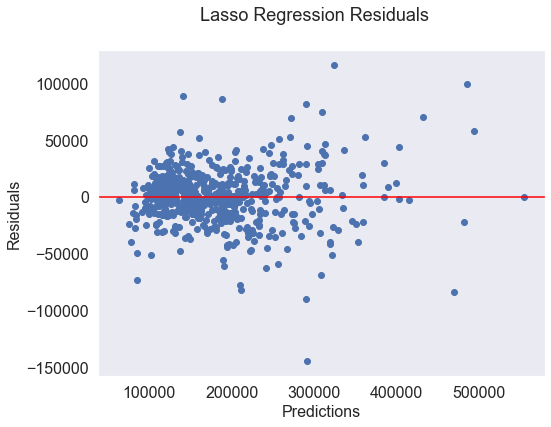

In [83]:
#Lasso Regression

plt.figure(figsize= (8,6))
axu = plt.scatter(viz2, res2);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Lasso Regression Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)

results_path = 'images/Lasso Residual.png'

#print(results_path)
plt.savefig(results_path)

#### **Finding #3 : Our residual for the Lasso regression looks to be acceptable and randomized the further you go out, but more analysis is needed on the cluster in the center-left**

## Ridge Regression Using Log
##### [Back to Table of Contents](#Table-of-Contents)

We will be adding another regression, the Ridge regression below, which runs an algorithm insert some degree of bias into the model, punishing independent variables (features) that have high correlations with each other. We should get a glimpse at how much collinearity there is in the model.

In [84]:
#Choose features and prediction variable
X3 = features
y3 = ames_train['SalePrice']

#Train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, 
                                                    y3, 
                                                    test_size=0.30, 
                                                    random_state=32)

ss = StandardScaler()
ss.fit(X_train3)

X_train_sc3 = ss.transform(X_train3)
X_test_sc3 = ss.transform(X_test3)


#Instantiate model
TTR2 = TransformedTargetRegressor(regressor=RidgeCV(),func=np.log,inverse_func=np.exp)

# Fit the model on training data
linreg3 = TTR2.fit(X_train_sc3, y_train3)

In [85]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg3, X_train_sc3, y_train3, cv = 5)

lr_scores.mean()

0.9060133790230814

#### **Finding #1 : Our Ridge Regression r-2 sees a minimal improvement compared to the Lasso Regression**

In [86]:
# Training score
print(linreg2.score(X_train_sc2, y_train2))

# Testing score
print(linreg2.score(X_test_sc2, y_test2))

0.9076964665694944
0.897468238774463


In [87]:
#train MSE

y_pred3 = linreg3.predict(X_train_sc3)
print("MSE: ")
print(mean_squared_error(y_train3, y_pred3))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_train3, y_pred3)))

MSE: 
581627364.9789265
RMSE: 
24116.951817734483


In [88]:
# test MSE

y_pred3 = linreg3.predict(X_test_sc3)
print("MSE: ")
print(mean_squared_error(y_test3, y_pred3))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_test3, y_pred3)))

MSE: 
588265637.5459676
RMSE: 
24254.18804136654


In [89]:
#Unable to see coefficient due to that feature not being present in transformed target regressor.

#### **Finding #2 : Our RMSE for our best performing regression shows that for any prediction, we are at most 24,200 away from true prediction.**

In [90]:
residuals3 = y_test3 - y_pred3 

viz3 = y_pred3
res3 = residuals3

Text(0, 0.5, 'Residuals')

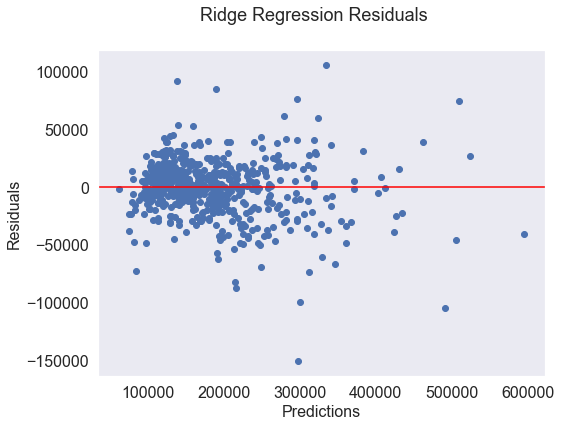

In [91]:
#Ridge Regression

plt.figure(figsize= (8,6))
axu = plt.scatter(viz3, res3);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Ridge Regression Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)



#### **Finding #3 : Our residual for the Lasso regression looks to be acceptable and randomized the further you go out, but more analysis is needed on the cluster in the center-left**

## Data Visualizations for Presentation
##### [Back to Table of Contents](#Table-of-Contents)

In [92]:
ames_train3 = np.log(ames_train['SalePrice'])

ames_train3

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: SalePrice, Length: 2043, dtype: float64

## LINE Assumptions
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity 
* I - Independence (of observations) -> True by assumption 
* N - Normality (of residuals)
* E - Equal variances (of residuals - AKA Homoscedasticity)

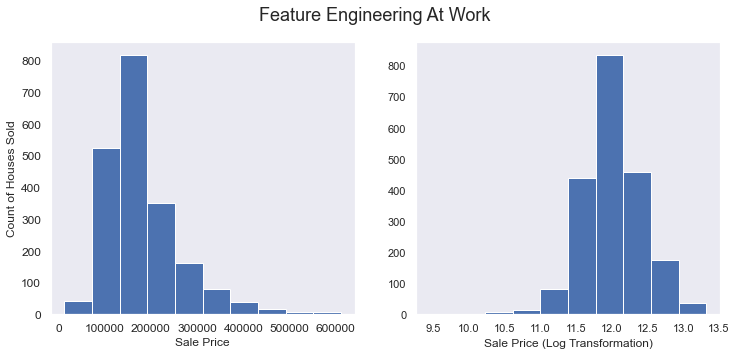

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(ames_train['SalePrice'])
axs[1].hist(ames_train3);

axs[0].set_xlabel('Sale Price')
axs[0].set_ylabel('Count of Houses Sold')
axs[1].set_xlabel('Sale Price (Log Transformation)')

axs[0].grid(False)
axs[1].grid(False)

axs[0].tick_params(axis='both', which='both', labelsize=12)

fig.suptitle('Feature Engineering At Work', fontsize=18)


plt.show()   

Text(0, 0.5, 'Residuals')

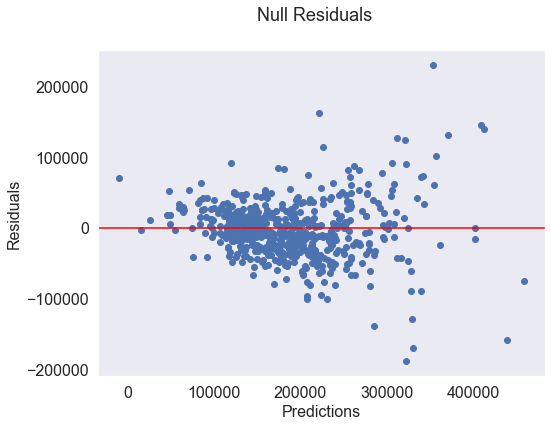

In [94]:


#First Regression
plt.figure(figsize= (8,6))
axu = plt.scatter(viz0, res0);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Null Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)

Text(0, 0.5, 'Residuals')

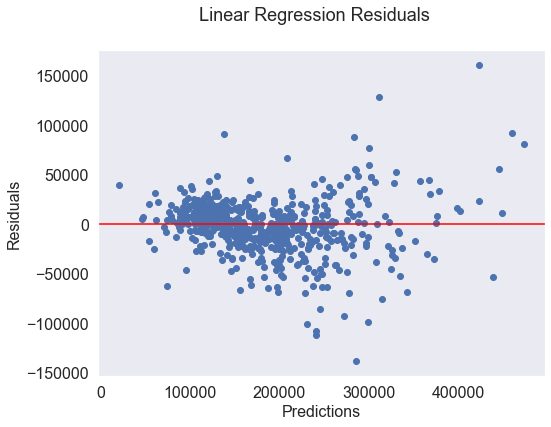

In [95]:
#First Regression
plt.figure(figsize= (8,6))
axu = plt.scatter(viz1, res1);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Linear Regression Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)


Text(0, 0.5, 'Residuals')

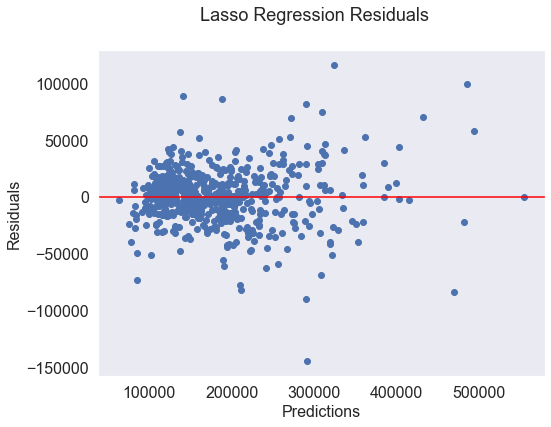

In [96]:
#Lasso Regression

plt.figure(figsize= (8,6))
axu = plt.scatter(viz2, res2);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Lasso Regression Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)



Text(0, 0.5, 'Residuals')

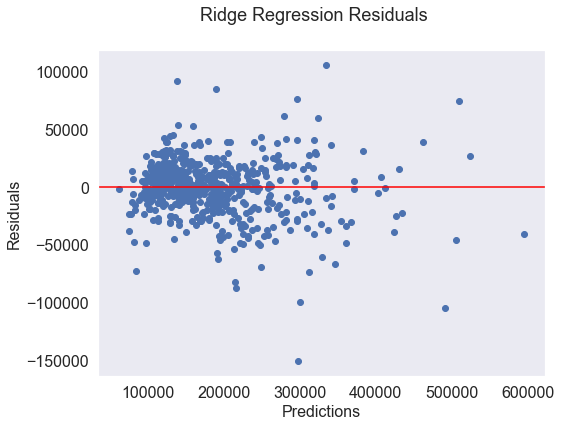

In [97]:
#Ridge Regression

plt.figure(figsize= (8,6))
axu = plt.scatter(viz3, res3);
plt.axhline(0, color='red');
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.suptitle('Ridge Regression Residuals', fontsize=18)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Residuals', fontsize=16)



# Conclusions and Recommendations
##### [Back to Table of Contents](#Table-of-Contents)

To conclude our analysis: 

We were able to predict and the price of a house at sale, but further analysis is need to provided an immediate price point for the house. We were able to pick up accurate RMSE values, but need to do further transformation to be able to show a dollar per unit comparison out of our coefficients. Regardless, our modeling showed the impact of analytical modeling on the ability to predict housing prices, a critical strategy for you as you enter the market.

Our model ran on over 17 different features, and performed well above our null model, with an RMSE improvement of well over 50,000.

We ran three models, a standard linear regression, and with a log transformation, lasso and ridge regressions. Our SLR regression saw an 88% r-squared score, which meant 88% of our variance was explained by our inputs. Our r-squared score therelightly overfit, so we ran and ended up choosing our Lasso regression, which regularized well and accounted for the skew in our y variable.

With the model we chose, our r-squared scoring was 90.6%, with a better fit between our test and variance data. Our RMSE for that data was 24,400, 3k above our SLR regression.

In terms of other key findings within the data, we identified the following:

- Surface area is a strong predictor or price in Ames, Iowa, and will be a strong predictor in other markets.

- Kitchens and exteriors that are in excellent condition have a strong correlaton with sale price in Ames, Iowa, indicitive of consumer preferences for both as opposed to other features.




Recommendations:

Having seen this modeling exercise we would encourage you to consider the following steps as you look to launch into the market.

As you enter the market:

- Prioritize surface area in your strategy- The data we modeled was very clear, surface area is probably the best predictor of pricing within the dataset, and out in the marketplace. It should be a significant feature in any modeling or analysis moving forward.

- Periodically review feature importance in pricing to find price multipliers-  Given some features are higher than others, and the market shifts constantly, there will always be price opportunities for those who see a trend and take advantage of it before the rest of the market. Specifically within our data, kitchen and exterior condition have a higher correlation with sales price than the # of baths or fireplaces in a home, so it can be inferenced that they are a higher priority. As well, exterior and kitchen features can vary a great deal, so customers may have changing tastes over time and need to be periodically evaluated.


How we can partner with you:

- Develop a specific model for your investment environment- The Ames data we showcased is just small sliver of what we do as a firm. As you look to enter into cities or investment opportunities around the country, feel free to reach out and utilize our domain experience and expertise. Specifically, we propose that we partner with you in your next venture, drawing in all available data and developing a model that is reproducible to other regions and one that fulfills a need for you in the short term.

- Develop a dashboard that can evaluate feature importance and changes over a rolling three-month period- This dashboard incorporates the model and fulfills the "Rule of three", a data benchmark that evaluates the market on the most current data. The dashboard would include a transformed coefficent list of various features, which would show the increase per unit at any given time. As well, there would be year-over-year and quarter-over-quarter values kept, which would show the change over time.

- Develop a real-time front-end solution (via js.react) that allows for you to specify metrics and get a predicted price out off of current data. This solution would run the modeling on the back-end, and would possibly incorporate the dashboard described above. Templates could be user-created to allow for quick access to a suite of features to choose from.
